## Part 3: Classifier

In [25]:
from nn.nn import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from nn.io import read_text_file, read_fasta_file
from nn.preprocess import sample_seqs, one_hot_encode_seqs

In [26]:
np.random.seed(42)

In [27]:
pos_seqs = read_text_file("./data/rap1-lieb-positives.txt")
neg_seqs = read_fasta_file("./data/yeast-upstream-1k-negative.fa")

In [28]:
neg_seq_edited = []

for neg_seq in neg_seqs:
	insert_ix = np.random.randint(0, len(neg_seq) - 16)
	neg_seq_edited.append(neg_seq[insert_ix:insert_ix+17])

all_seqs = pos_seqs + neg_seq_edited
all_labels = [1] * len(pos_seqs) + [0] * len(neg_seqs)

# random sampling
all_seqs, all_labels = sample_seqs(all_seqs, all_labels)

In [29]:
X = one_hot_encode_seqs(all_seqs)
y = np.array(all_labels).reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:

nn = NeuralNetwork(
    nn_arch=[
        {"input_dim": len(X_train[0]), "output_dim": 100, "activation": "relu"},
        {"input_dim": 100, "output_dim": 50, "activation": "relu"},
        {"input_dim": 50, "output_dim": 1, "activation": "sigmoid"}
    ],
    lr=0.001,
    seed=0,
    batch_size=20,
    epochs=20,
    loss_function="binary_cross_entropy",
)

In [31]:
per_epoch_loss_train, per_epoch_loss_val = nn.fit(X_train, y_train, X_val, y_val)

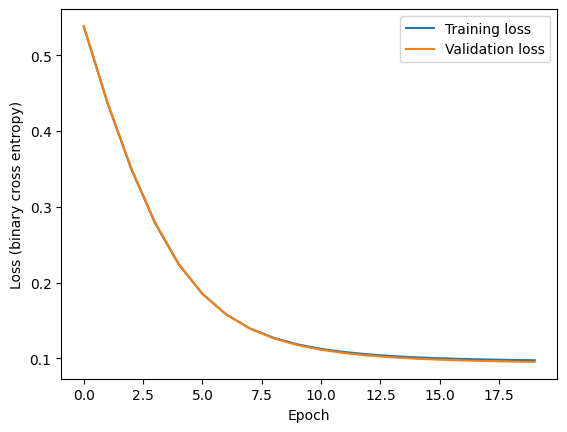

In [33]:
plt.plot(per_epoch_loss_train, label="Training loss")
plt.plot(per_epoch_loss_val, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (binary cross entropy)")
plt.legend()
plt.show()

## Parameters
I had to tune the parameters of the classifier to get the best results (learning rate too high resulted in an increasing validation loss over epochs).
I used binary cross entropy since it is a binary classification problem.